In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing libraries

In [3]:
dataset = pd.read_csv("Kidney_disease.csv")

In [4]:
#Checking first 5 rows
dataset.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [5]:
print(dataset.info()) #getting important info about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
dataset.describe() #Getting statistical summary

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

In [7]:
dataset.isnull().sum()  #checking missing values

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


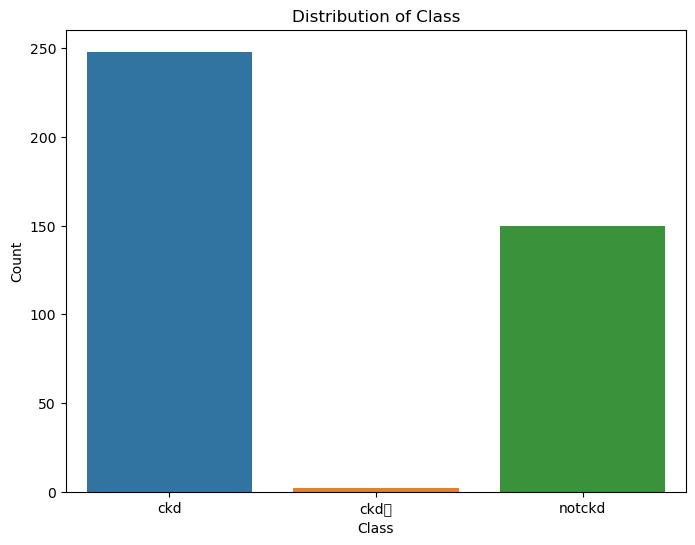

In [9]:
# Visualizing the distribution of the target variable 'class'
plt.figure(figsize=(8, 6))
sns.countplot(x='classification', data=dataset)
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/var/folders/b7/n0s9q4050pn7xr85dwrlqrwh0000gn/T/ipykernel_27112/816017674.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")


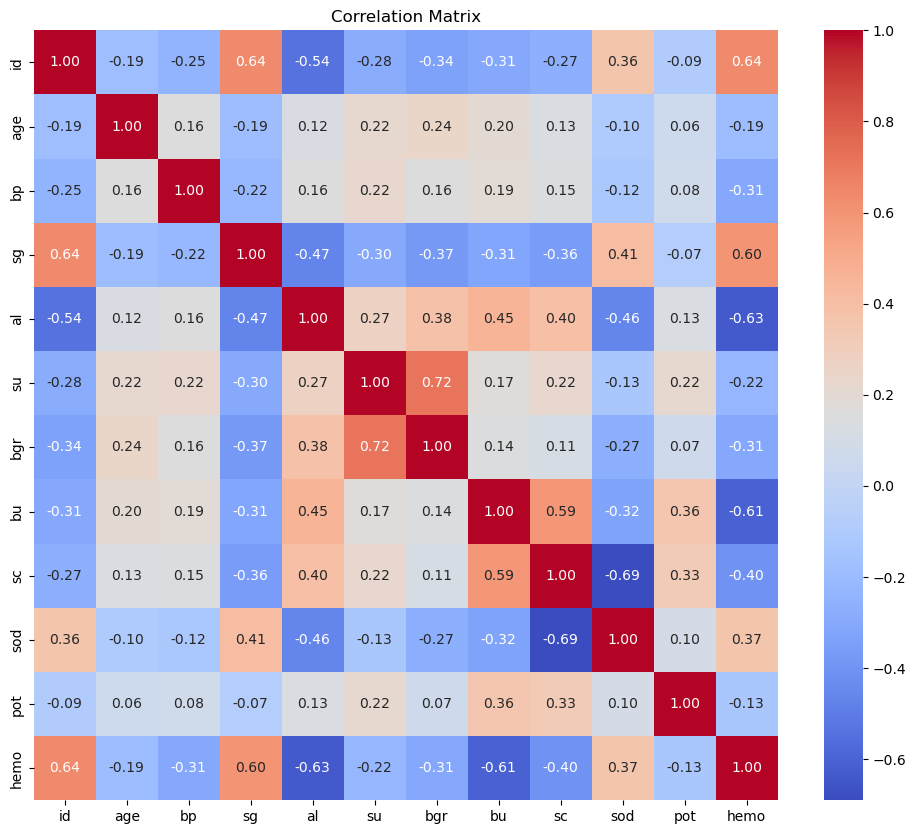

In [10]:
# Visualizing the correlation matrix /heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

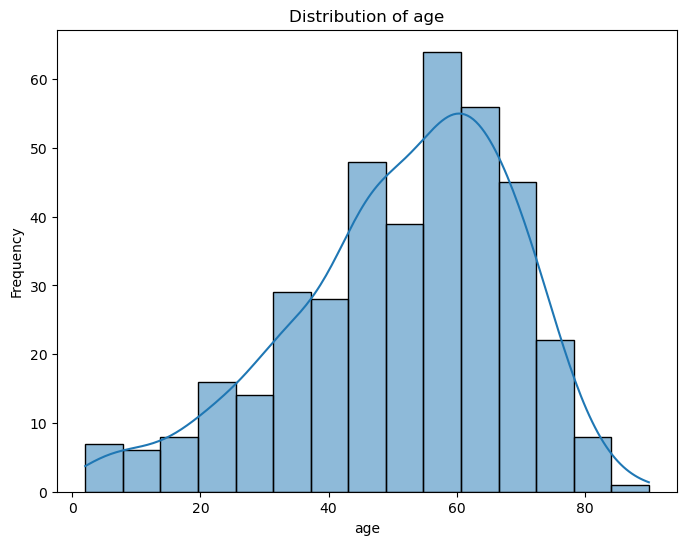

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


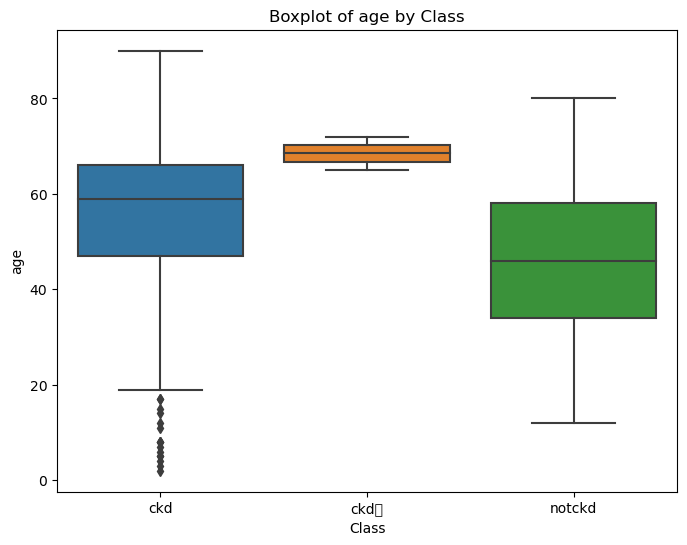

In [19]:
# numeric features distibution ONE by ONE and finding outliers in all of these

plt.figure(figsize=(8, 6))
sns.histplot(dataset['age'], kde=True)
plt.title('Distribution of age')
plt.xlabel("age")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='age', data=dataset)
plt.title('Boxplot of age by Class')
plt.xlabel('Class')
plt.ylabel('age')
plt.show()


In [20]:
#Doing little data preprocessing
#dataset.drop(columns=['id'],axis=1,inplace=True)


In [21]:
print(f"classification has {dataset['classification'].unique()} values in it\n")

classification has ['ckd' 'ckd\t' 'notckd'] values in it



In [18]:
dataset.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

In [23]:
dataset['classification'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [24]:
dataset.head()

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

In [25]:
#After a little data preprocessing we converted it in binary problem.
print(f"classification has {dataset['classification'].unique()} values in it\n")

classification has ['ckd' 'notckd'] values in it



# Now Lets find out the distribution using corrected data

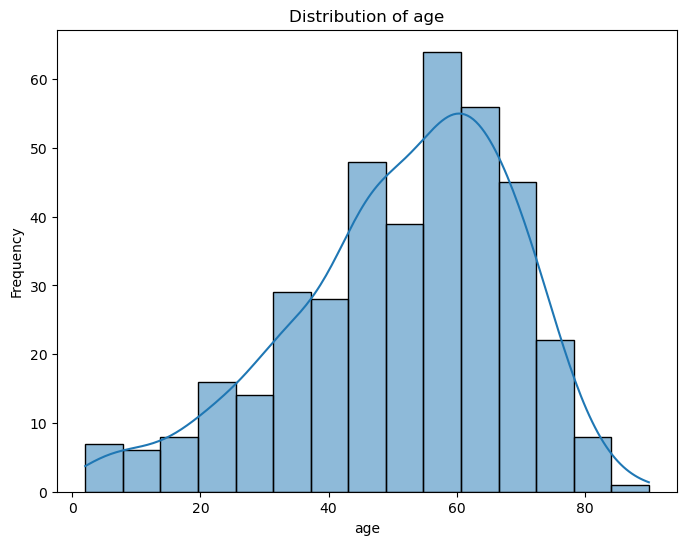

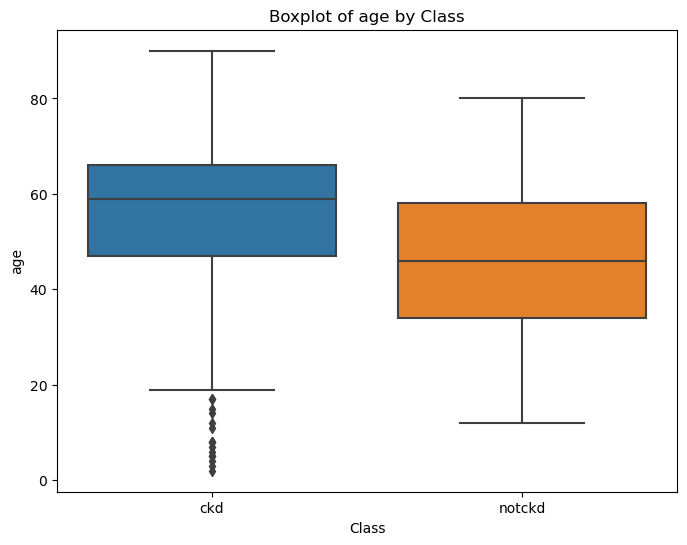

In [26]:
#Distribution Plot of Age
plt.figure(figsize=(8, 6))
sns.histplot(dataset['age'], kde=True)
plt.title('Distribution of age')
plt.xlabel("age")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='age', data=dataset)
plt.title('Boxplot of age by Class')
plt.xlabel('Class')
plt.ylabel('age')
plt.show()


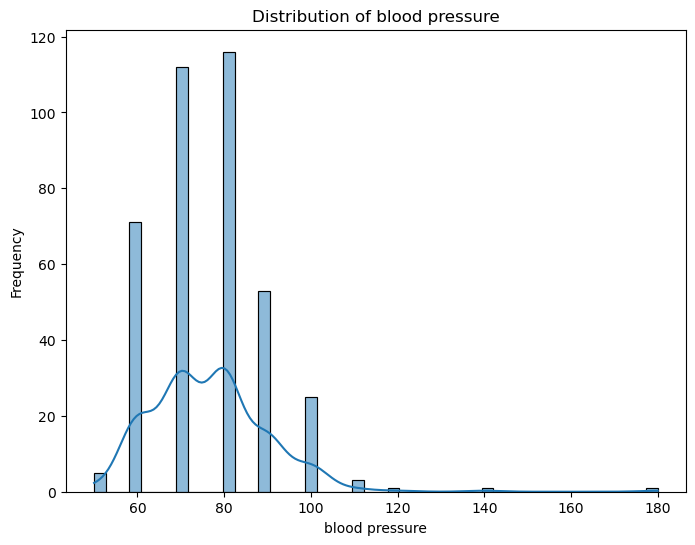

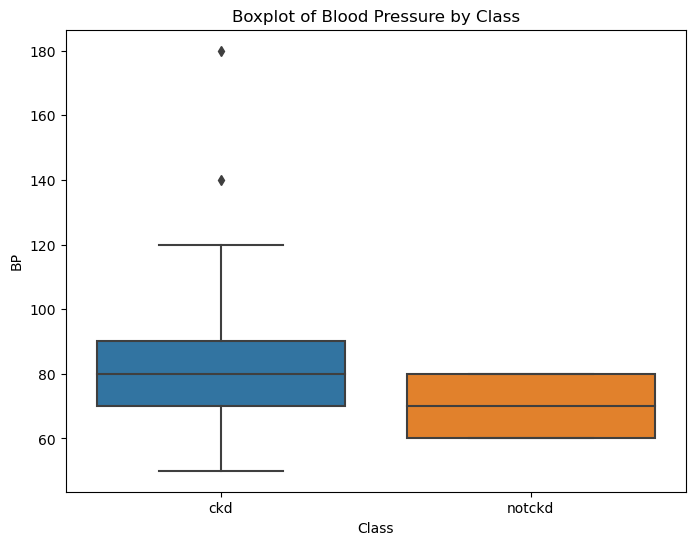

In [27]:
#Distribution Plot of bp
plt.figure(figsize=(8, 6))
sns.histplot(dataset['bp'], kde=True)
plt.title('Distribution of blood pressure')
plt.xlabel("blood pressure")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='bp', data=dataset)
plt.title('Boxplot of Blood Pressure by Class')
plt.xlabel('Class')
plt.ylabel('BP')
plt.show()


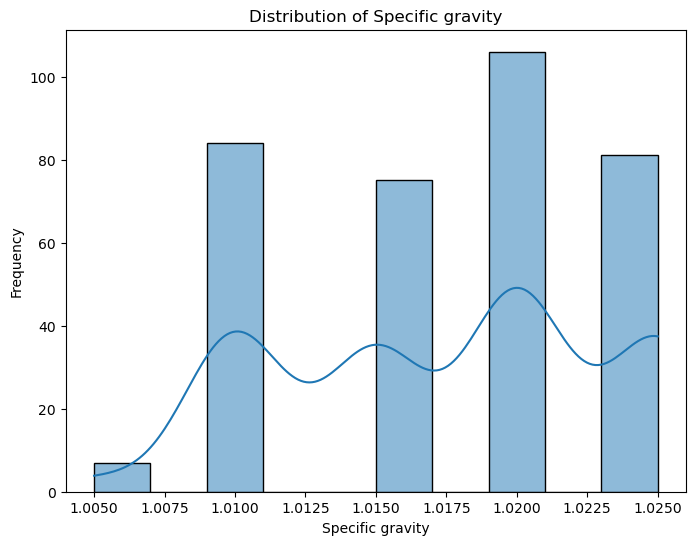

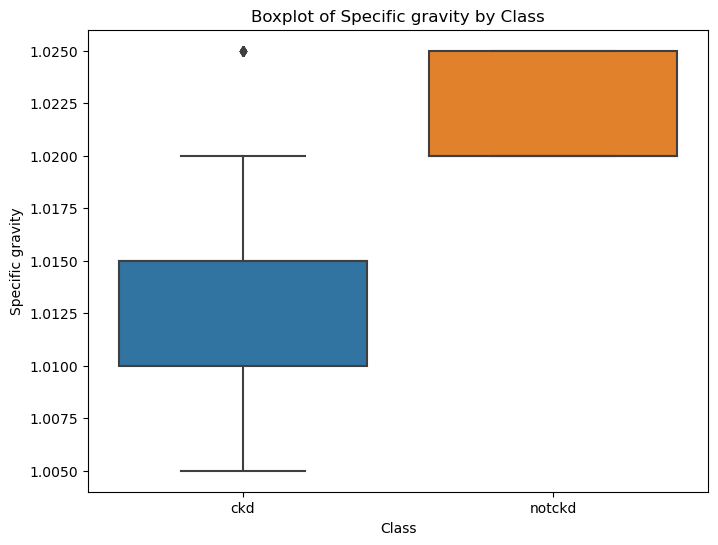

In [28]:
#Distribution Plot of Specific gravity
plt.figure(figsize=(8, 6))
sns.histplot(dataset['sg'], kde=True)
plt.title('Distribution of Specific gravity')
plt.xlabel("Specific gravity")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='sg', data=dataset)
plt.title('Boxplot of Specific gravity by Class')
plt.xlabel('Class')
plt.ylabel('Specific gravity')
plt.show()


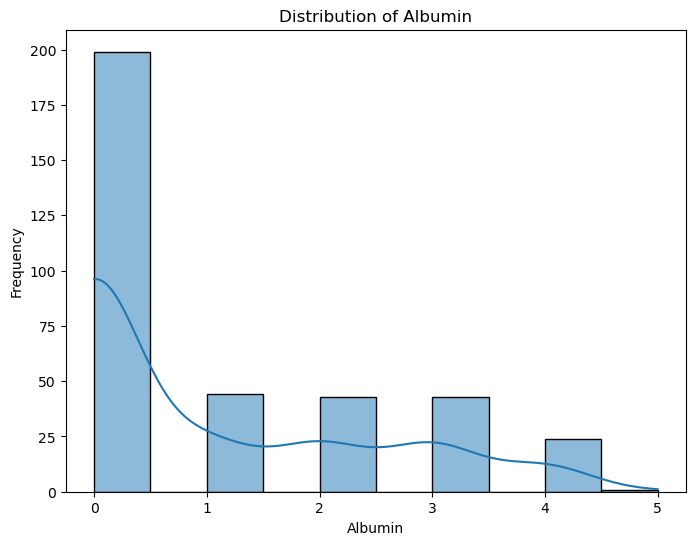

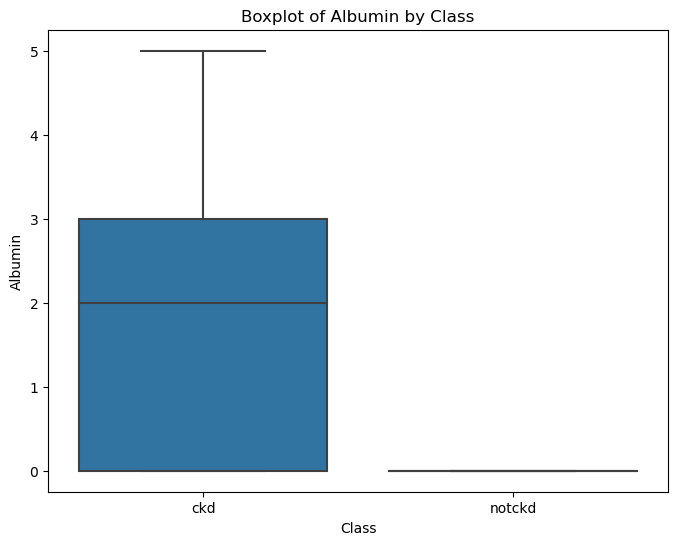

In [29]:
#Distribution Plot of Albumin
plt.figure(figsize=(8, 6))
sns.histplot(dataset['al'], kde=True)
plt.title('Distribution of Albumin')
plt.xlabel("Albumin")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='al', data=dataset)
plt.title('Boxplot of Albumin by Class')
plt.xlabel('Class')
plt.ylabel('Albumin')
plt.show()

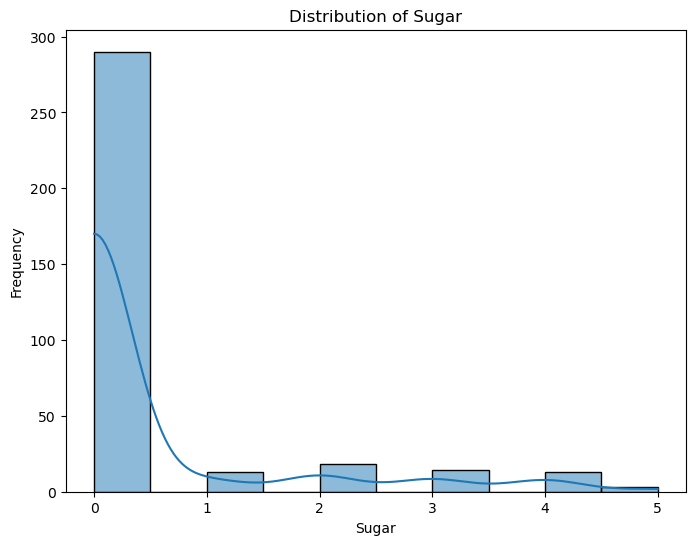

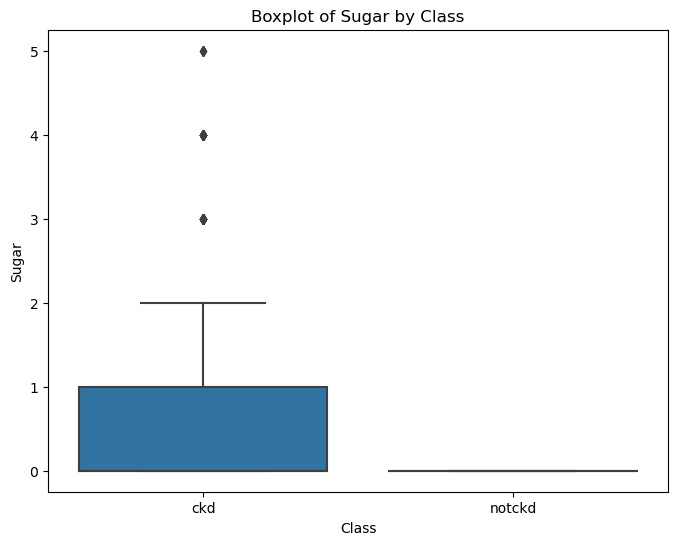

In [30]:
#Distribution Plot of Sugar
plt.figure(figsize=(8, 6))
sns.histplot(dataset['su'], kde=True)
plt.title('Distribution of Sugar')
plt.xlabel("Sugar")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='su', data=dataset)
plt.title('Boxplot of Sugar by Class')
plt.xlabel('Class')
plt.ylabel('Sugar')
plt.show()

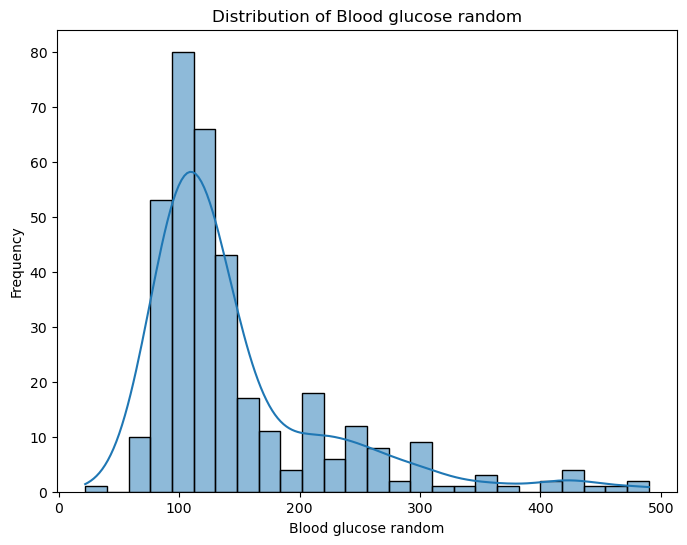

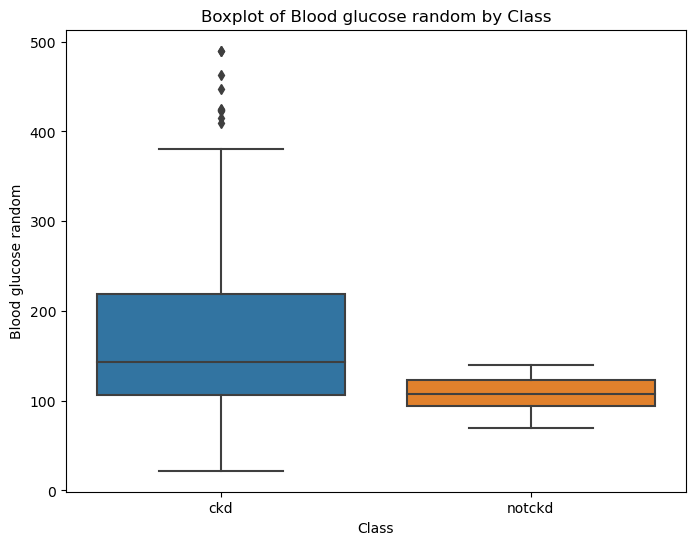

In [32]:
#Distribution Plot of Blood glucose random
plt.figure(figsize=(8, 6))
sns.histplot(dataset['bgr'], kde=True)
plt.title('Distribution of Blood glucose random')
plt.xlabel("Blood glucose random")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='bgr', data=dataset)
plt.title('Boxplot of Blood glucose random by Class')
plt.xlabel('Class')
plt.ylabel('Blood glucose random')
plt.show()


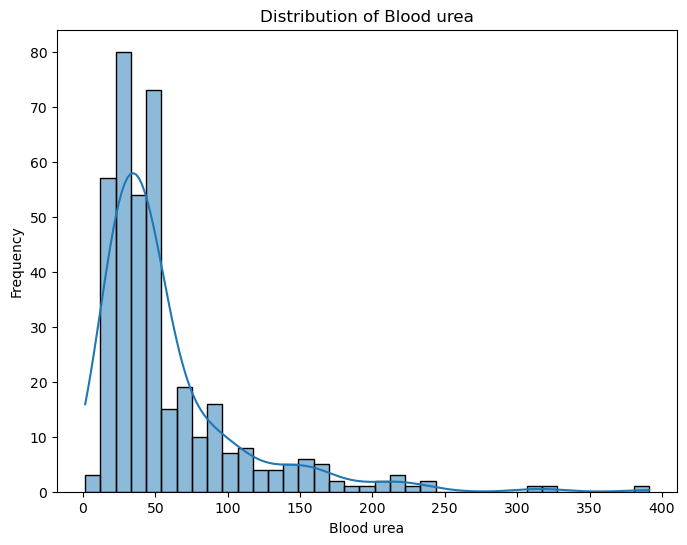

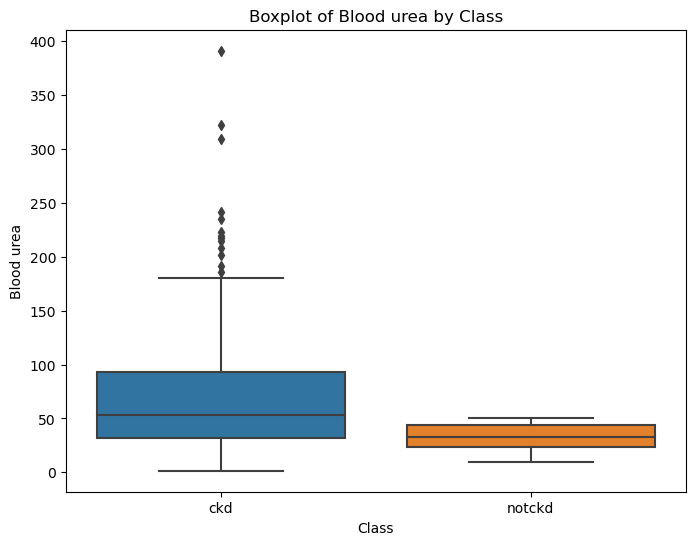

In [33]:
#Distribution Plot of Blood urea
plt.figure(figsize=(8, 6))
sns.histplot(dataset['bu'], kde=True)
plt.title('Distribution of Blood urea')
plt.xlabel("Blood urea")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='bu', data=dataset)
plt.title('Boxplot of Blood urea by Class')
plt.xlabel('Class')
plt.ylabel('Blood urea')
plt.show()


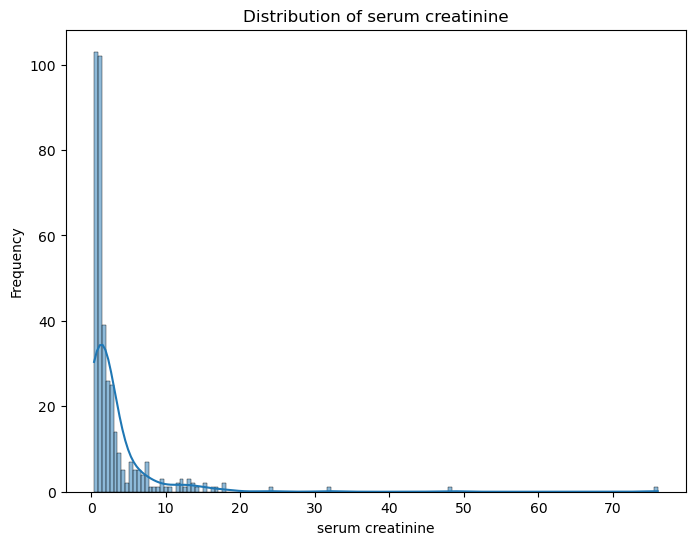

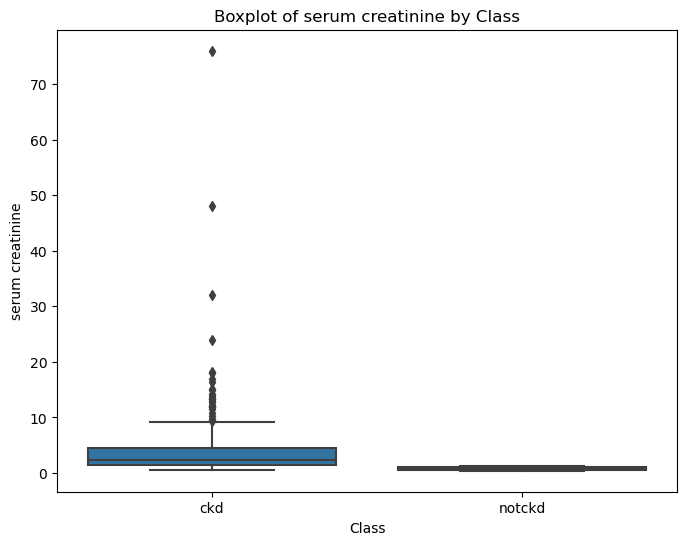

In [34]:
#Distribution Plot of serum creatinine
plt.figure(figsize=(8, 6))
sns.histplot(dataset['sc'], kde=True)
plt.title('Distribution of serum creatinine')
plt.xlabel("serum creatinine")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='sc', data=dataset)
plt.title('Boxplot of serum creatinine by Class')
plt.xlabel('Class')
plt.ylabel('serum creatinine')
plt.show()


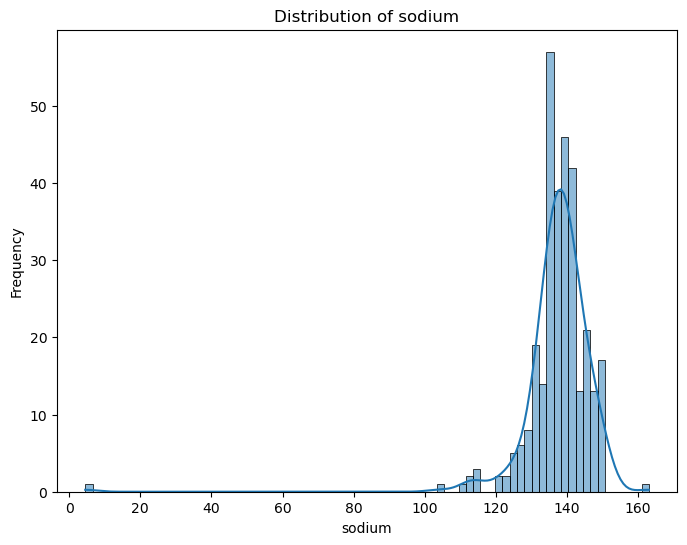

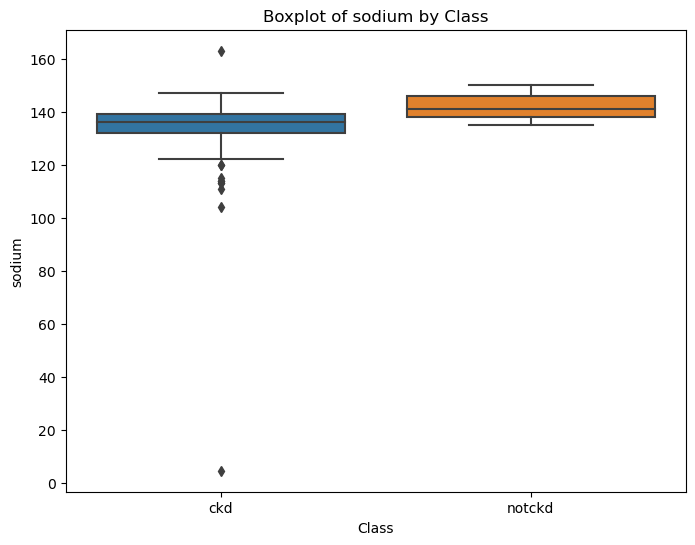

In [35]:
#Distribution Plot of sodium
plt.figure(figsize=(8, 6))
sns.histplot(dataset['sod'], kde=True)
plt.title('Distribution of sodium')
plt.xlabel("sodium")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='sod', data=dataset)
plt.title('Boxplot of sodium by Class')
plt.xlabel('Class')
plt.ylabel('sodium')
plt.show()

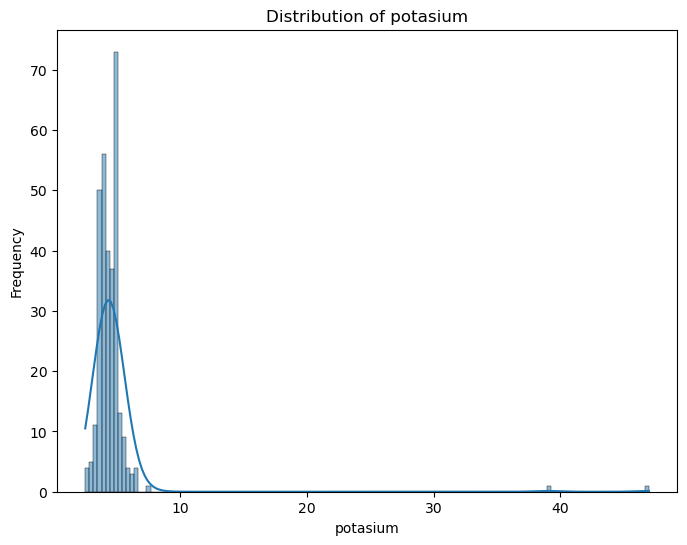

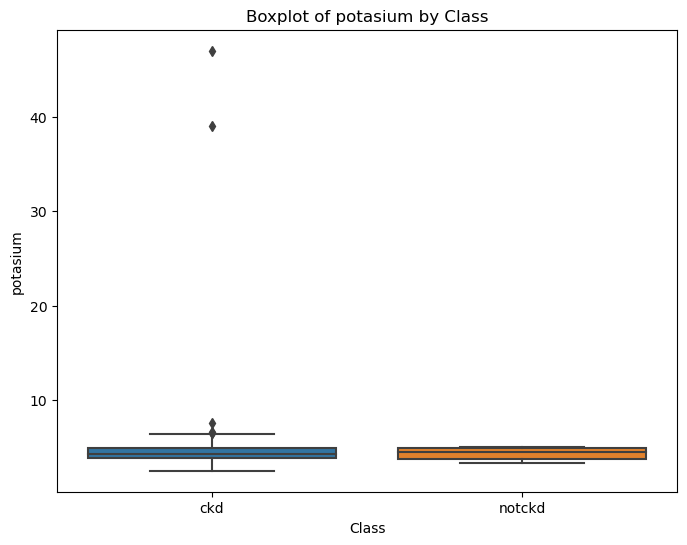

In [36]:
#Distribution Plot of potasium
plt.figure(figsize=(8, 6))
sns.histplot(dataset['pot'], kde=True)
plt.title('Distribution of potasium')
plt.xlabel("potasium")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='pot', data=dataset)
plt.title('Boxplot of potasium by Class')
plt.xlabel('Class')
plt.ylabel('potasium')
plt.show()

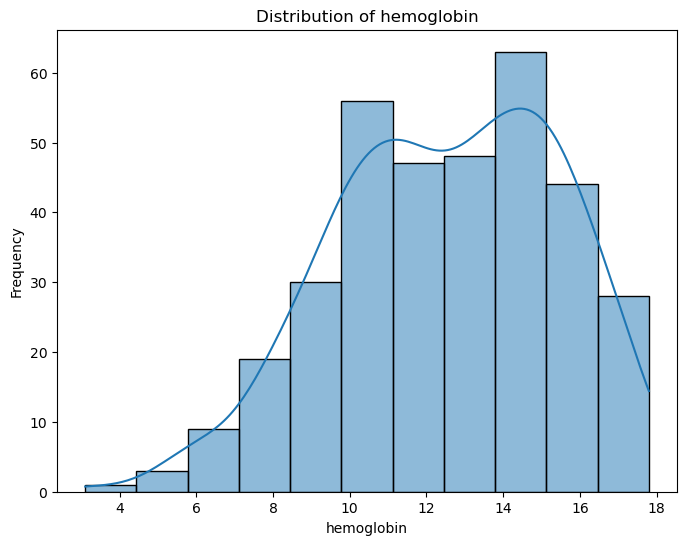

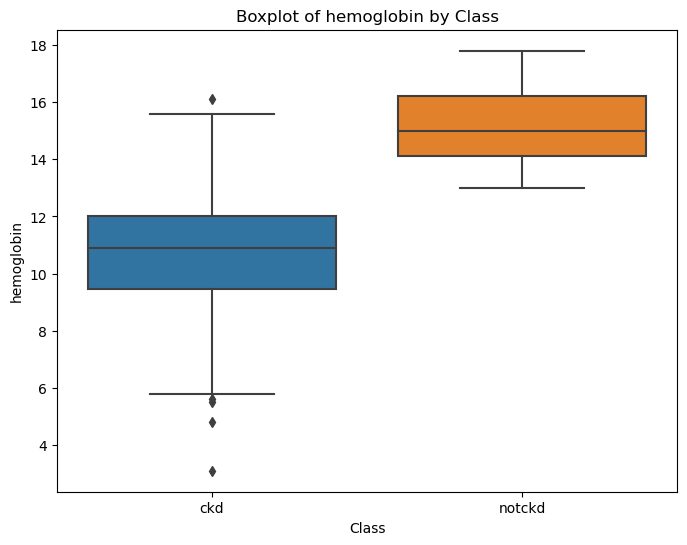

In [37]:
#Distribution Plot of hemoglobin
plt.figure(figsize=(8, 6))
sns.histplot(dataset['hemo'], kde=True)
plt.title('Distribution of hemoglobin')
plt.xlabel("hemoglobin")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='hemo', data=dataset)
plt.title('Boxplot of hemoglobin by Class')
plt.xlabel('Class')
plt.ylabel('hemoglobin')
plt.show()

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


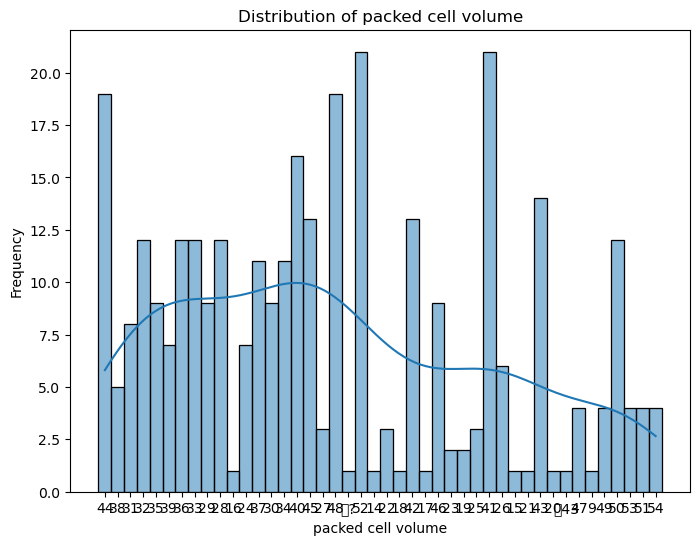

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 800x600 with 0 Axes>

In [38]:
#Distribution Plot of packed cell volume
plt.figure(figsize=(8, 6))
sns.histplot(dataset['pcv'], kde=True)
plt.title('Distribution of packed cell volume')
plt.xlabel("packed cell volume")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='pcv', data=dataset)
plt.title('Boxplot of packed cell volume by Class')
plt.xlabel('Class')
plt.ylabel('packed cell volume')
plt.show()

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


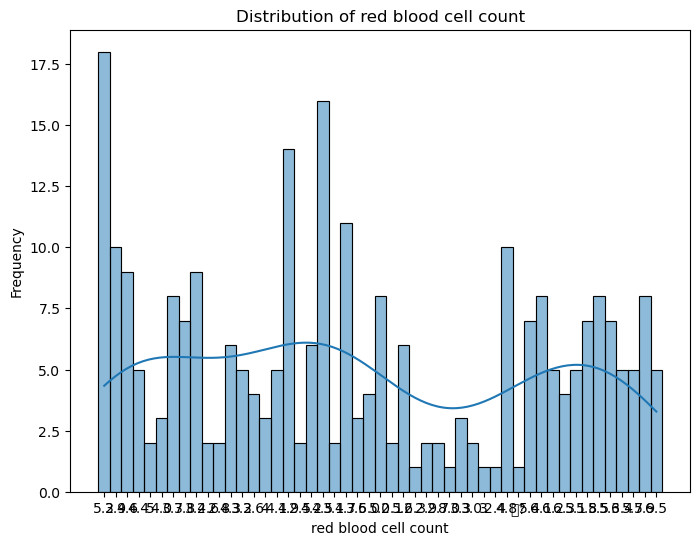

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 800x600 with 0 Axes>

In [39]:
#Distribution Plot of red blood cell count
plt.figure(figsize=(8, 6))
sns.histplot(dataset['rc'], kde=True)
plt.title('Distribution of red blood cell count')
plt.xlabel("red blood cell count")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='rc', data=dataset)
plt.title('Boxplot of red blood cell count by Class')
plt.xlabel('Class')
plt.ylabel('red blood cell count')
plt.show()

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


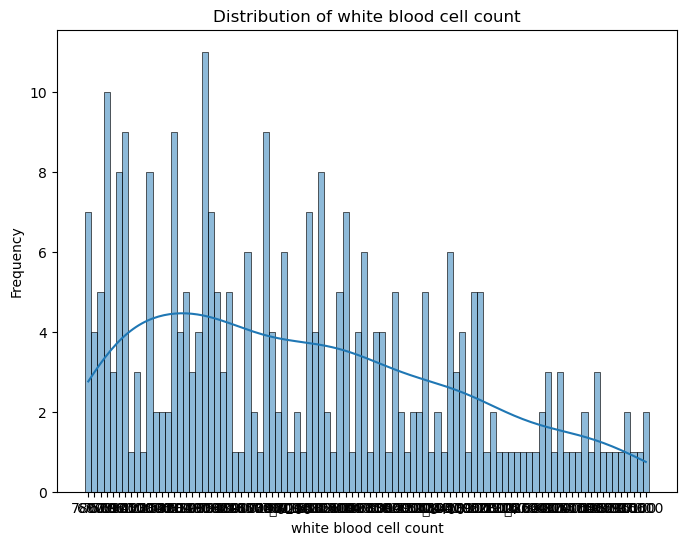

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 800x600 with 0 Axes>

In [40]:
#Distribution Plot of white blood cell count
plt.figure(figsize=(8, 6))
sns.histplot(dataset['wc'], kde=True)
plt.title('Distribution of white blood cell count')
plt.xlabel("white blood cell count")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='wc', data=dataset)
plt.title('Boxplot of white blood cell count by Class')
plt.xlabel('Class')
plt.ylabel('white blood cell count')
plt.show()

In [41]:
# Convert 'rc', 'wc', and 'pcv' columns to float
dataset['rc'] = dataset['rc'].replace('\t','', regex=True) # remove any tab characters if present
dataset['rc'] = dataset['rc'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
dataset['rc'] = dataset['rc'].astype(float)

dataset['wc'] = dataset['wc'].replace('\t','', regex=True) # remove any tab characters if present
dataset['wc'] = dataset['wc'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
dataset['wc'] = dataset['wc'].astype(float)

dataset['pcv'] = dataset['pcv'].replace('\t','', regex=True) # remove any tab characters if present
dataset['pcv'] = dataset['pcv'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
dataset['pcv'] = dataset['pcv'].astype(float)


/var/folders/b7/n0s9q4050pn7xr85dwrlqrwh0000gn/T/ipykernel_27112/769486632.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['rc'] = dataset['rc'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
/var/folders/b7/n0s9q4050pn7xr85dwrlqrwh0000gn/T/ipykernel_27112/769486632.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['wc'] = dataset['wc'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
/var/folders/b7/n0s9q4050pn7xr85dwrlqrwh0000gn/T/ipykernel_27112/769486632.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['pcv'] = dataset['pcv'].str.replace('\?', 'NaN') # replace '?' with 'NaN'


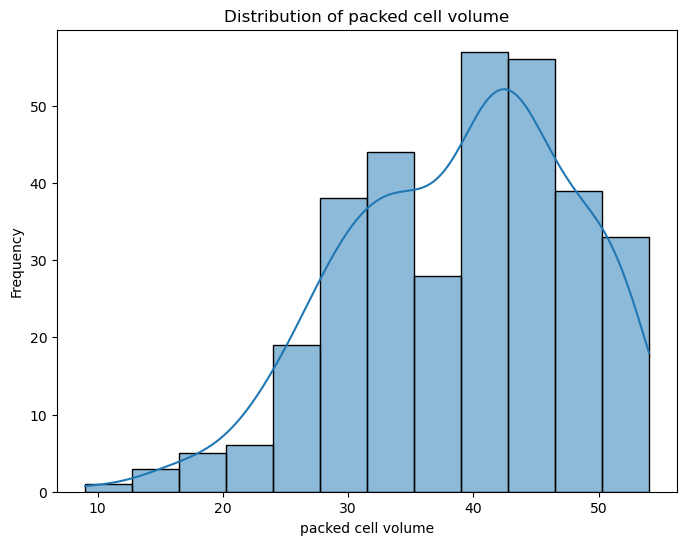

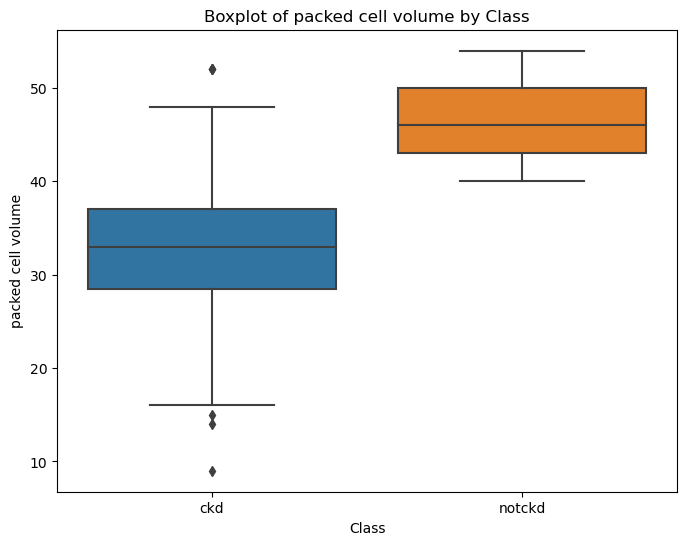

In [42]:
#Distribution Plot of packed cell volume
plt.figure(figsize=(8, 6))
sns.histplot(dataset['pcv'], kde=True)
plt.title('Distribution of packed cell volume')
plt.xlabel("packed cell volume")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='pcv', data=dataset)
plt.title('Boxplot of packed cell volume by Class')
plt.xlabel('Class')
plt.ylabel('packed cell volume')
plt.show()

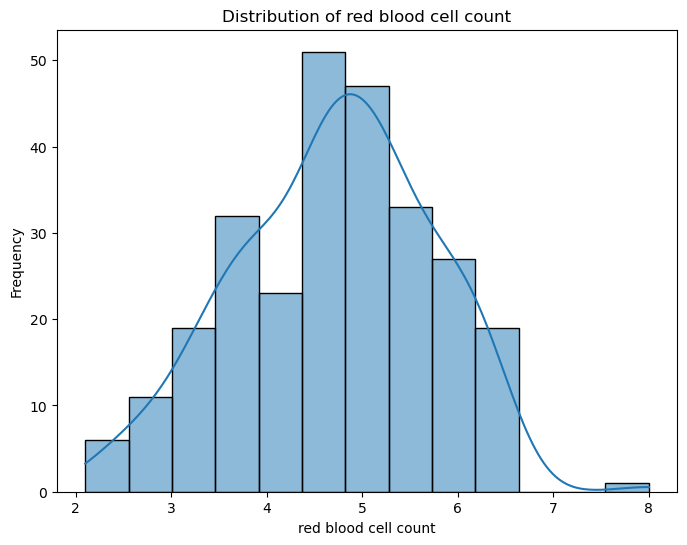

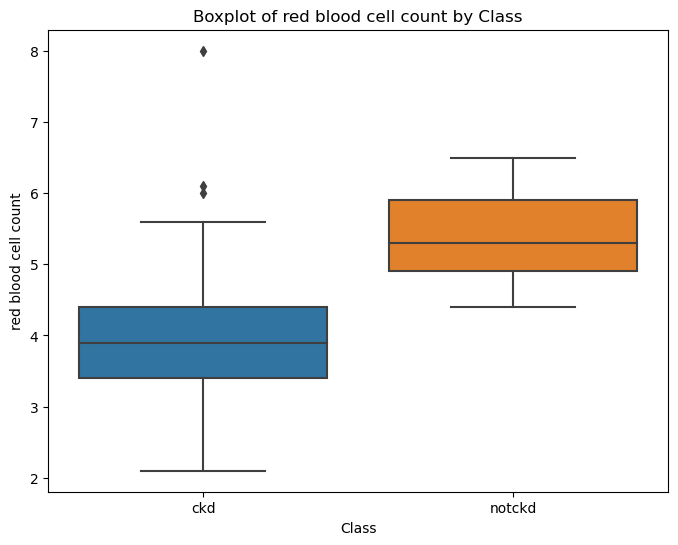

In [43]:
#Distribution Plot of red blood cell count
plt.figure(figsize=(8, 6))
sns.histplot(dataset['rc'], kde=True)
plt.title('Distribution of red blood cell count')
plt.xlabel("red blood cell count")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='rc', data=dataset)
plt.title('Boxplot of red blood cell count by Class')
plt.xlabel('Class')
plt.ylabel('red blood cell count')
plt.show()

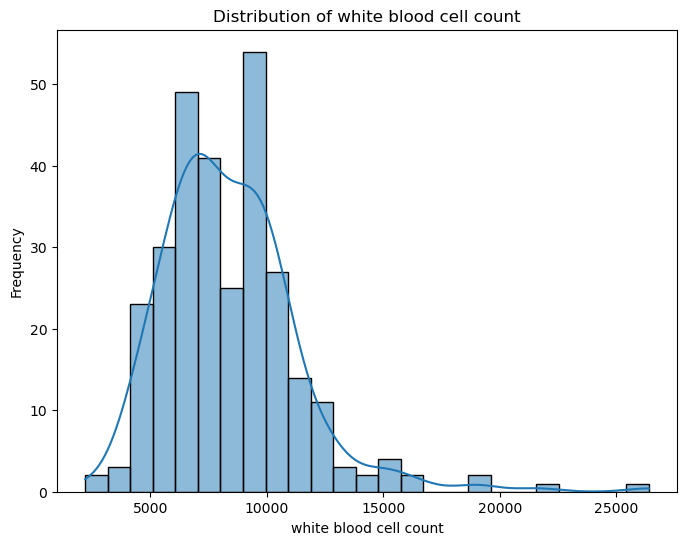

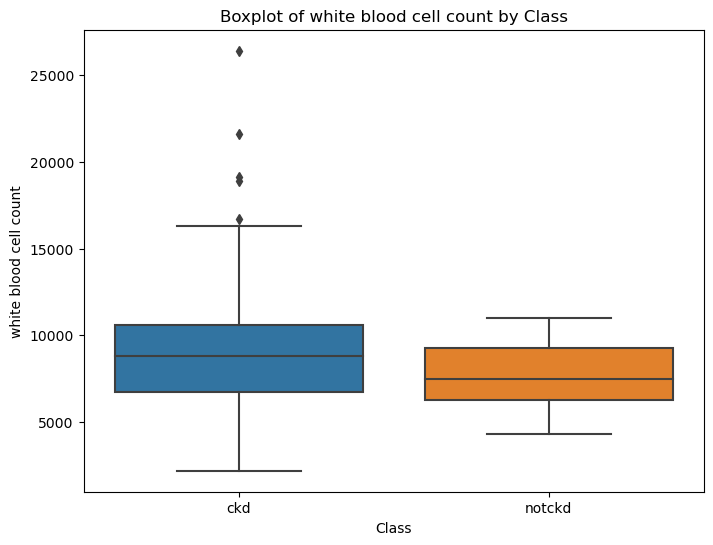

In [44]:
#Distribution Plot of white blood cell count
plt.figure(figsize=(8, 6))
sns.histplot(dataset['wc'], kde=True)
plt.title('Distribution of white blood cell count')
plt.xlabel("white blood cell count")
plt.ylabel('Frequency')
plt.show()

# Identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='classification', y='wc', data=dataset)
plt.title('Boxplot of white blood cell count by Class')
plt.xlabel('Class')
plt.ylabel('white blood cell count')
plt.show()

# working with the categorical features
rbc (Red Blood Cells)
pc (Pus Cell)
pcc (Pus Cell Clumps)
ba (Bacteria)
htn (Hypertension)
dm (Diabetes Mellitus)
cad (Coronary Artery Disease)
appet (Appetite)
pe (Pedal Edema)
ane (Anemia)


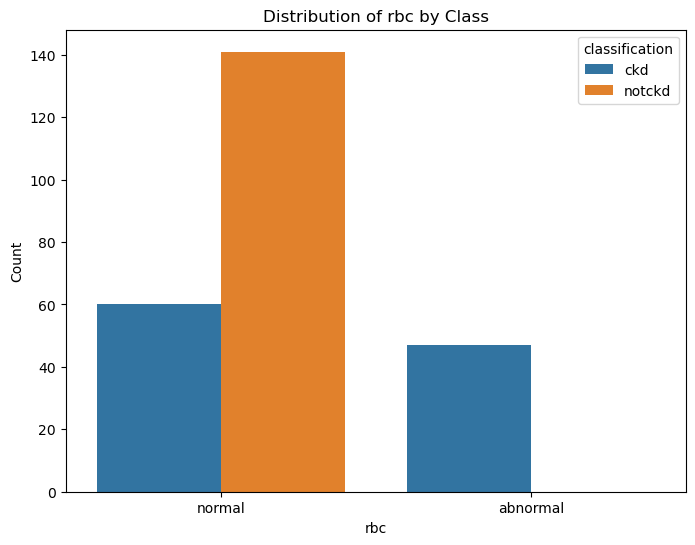

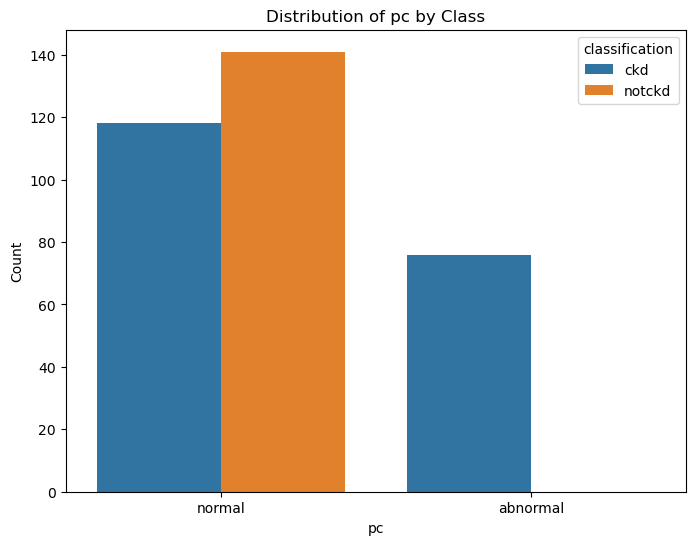

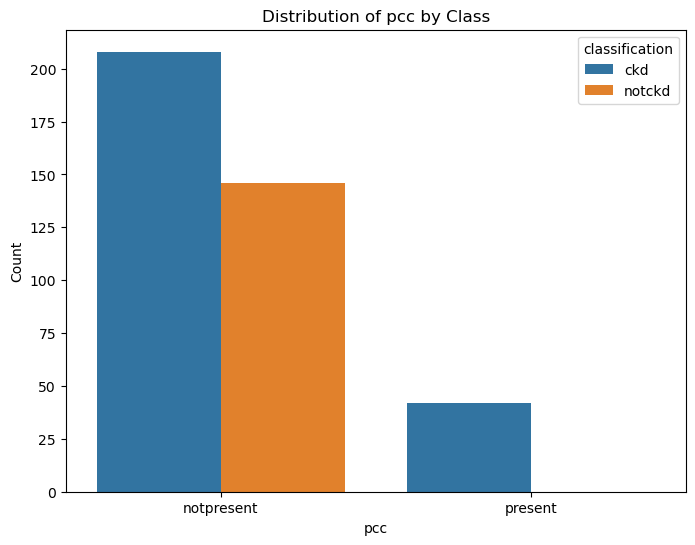

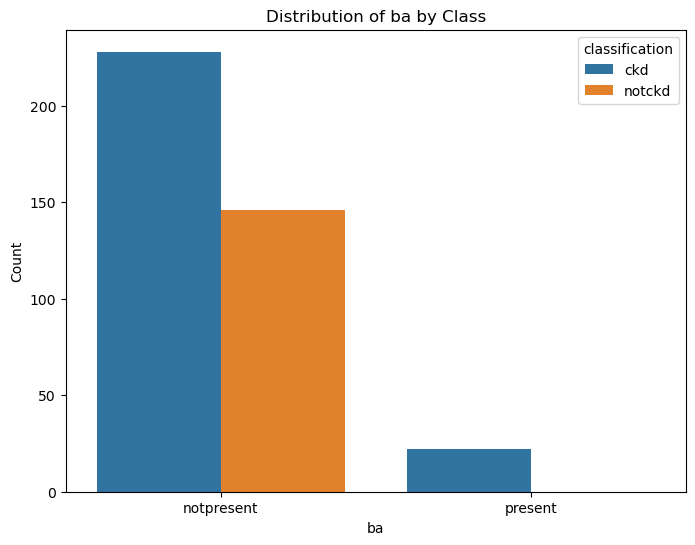

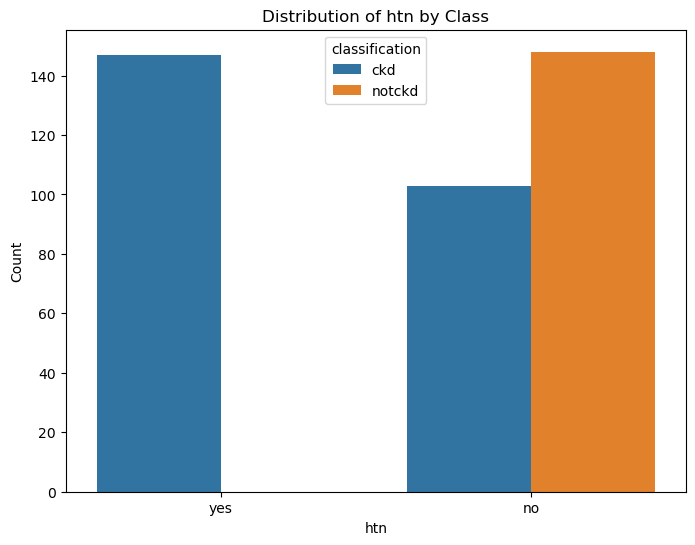

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


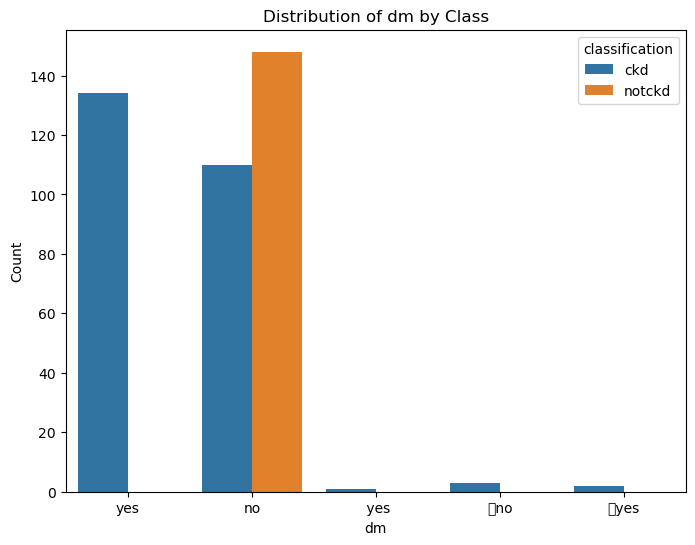

/Users/sonuyadavkhairwal/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


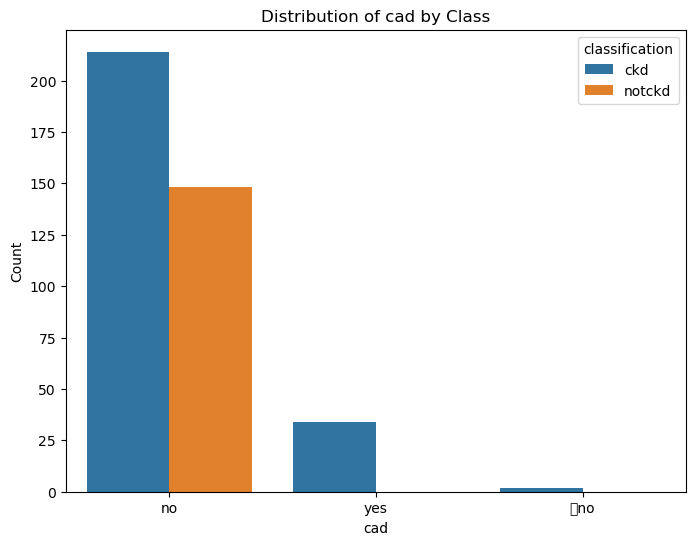

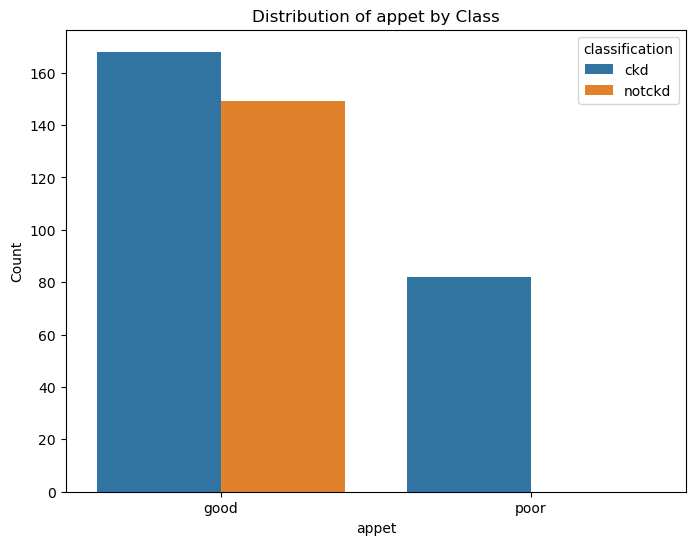

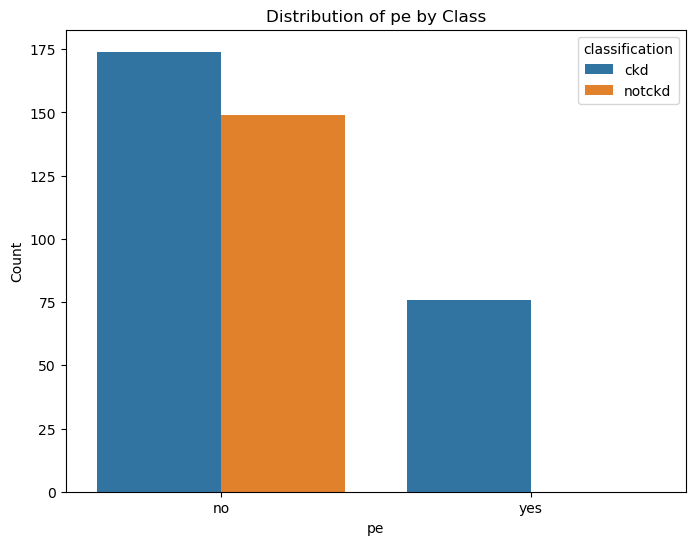

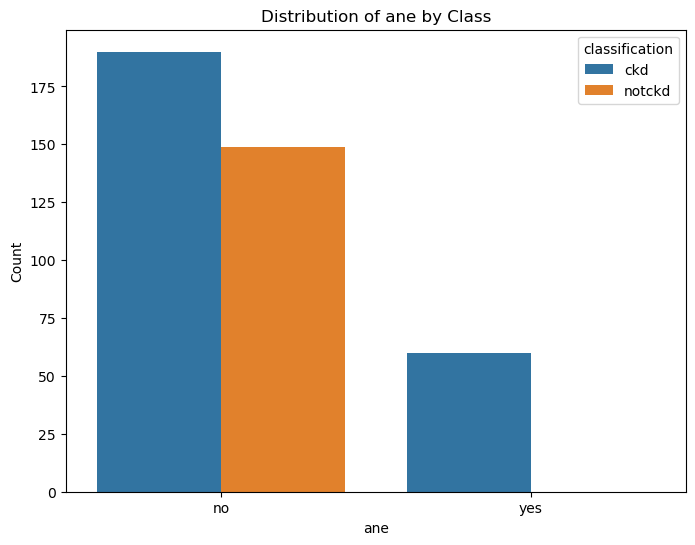

In [46]:
categorical_features = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=dataset, hue='classification')
    plt.title(f'Distribution of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [47]:
numerical_features = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

<Figure size 1200x1000 with 0 Axes>

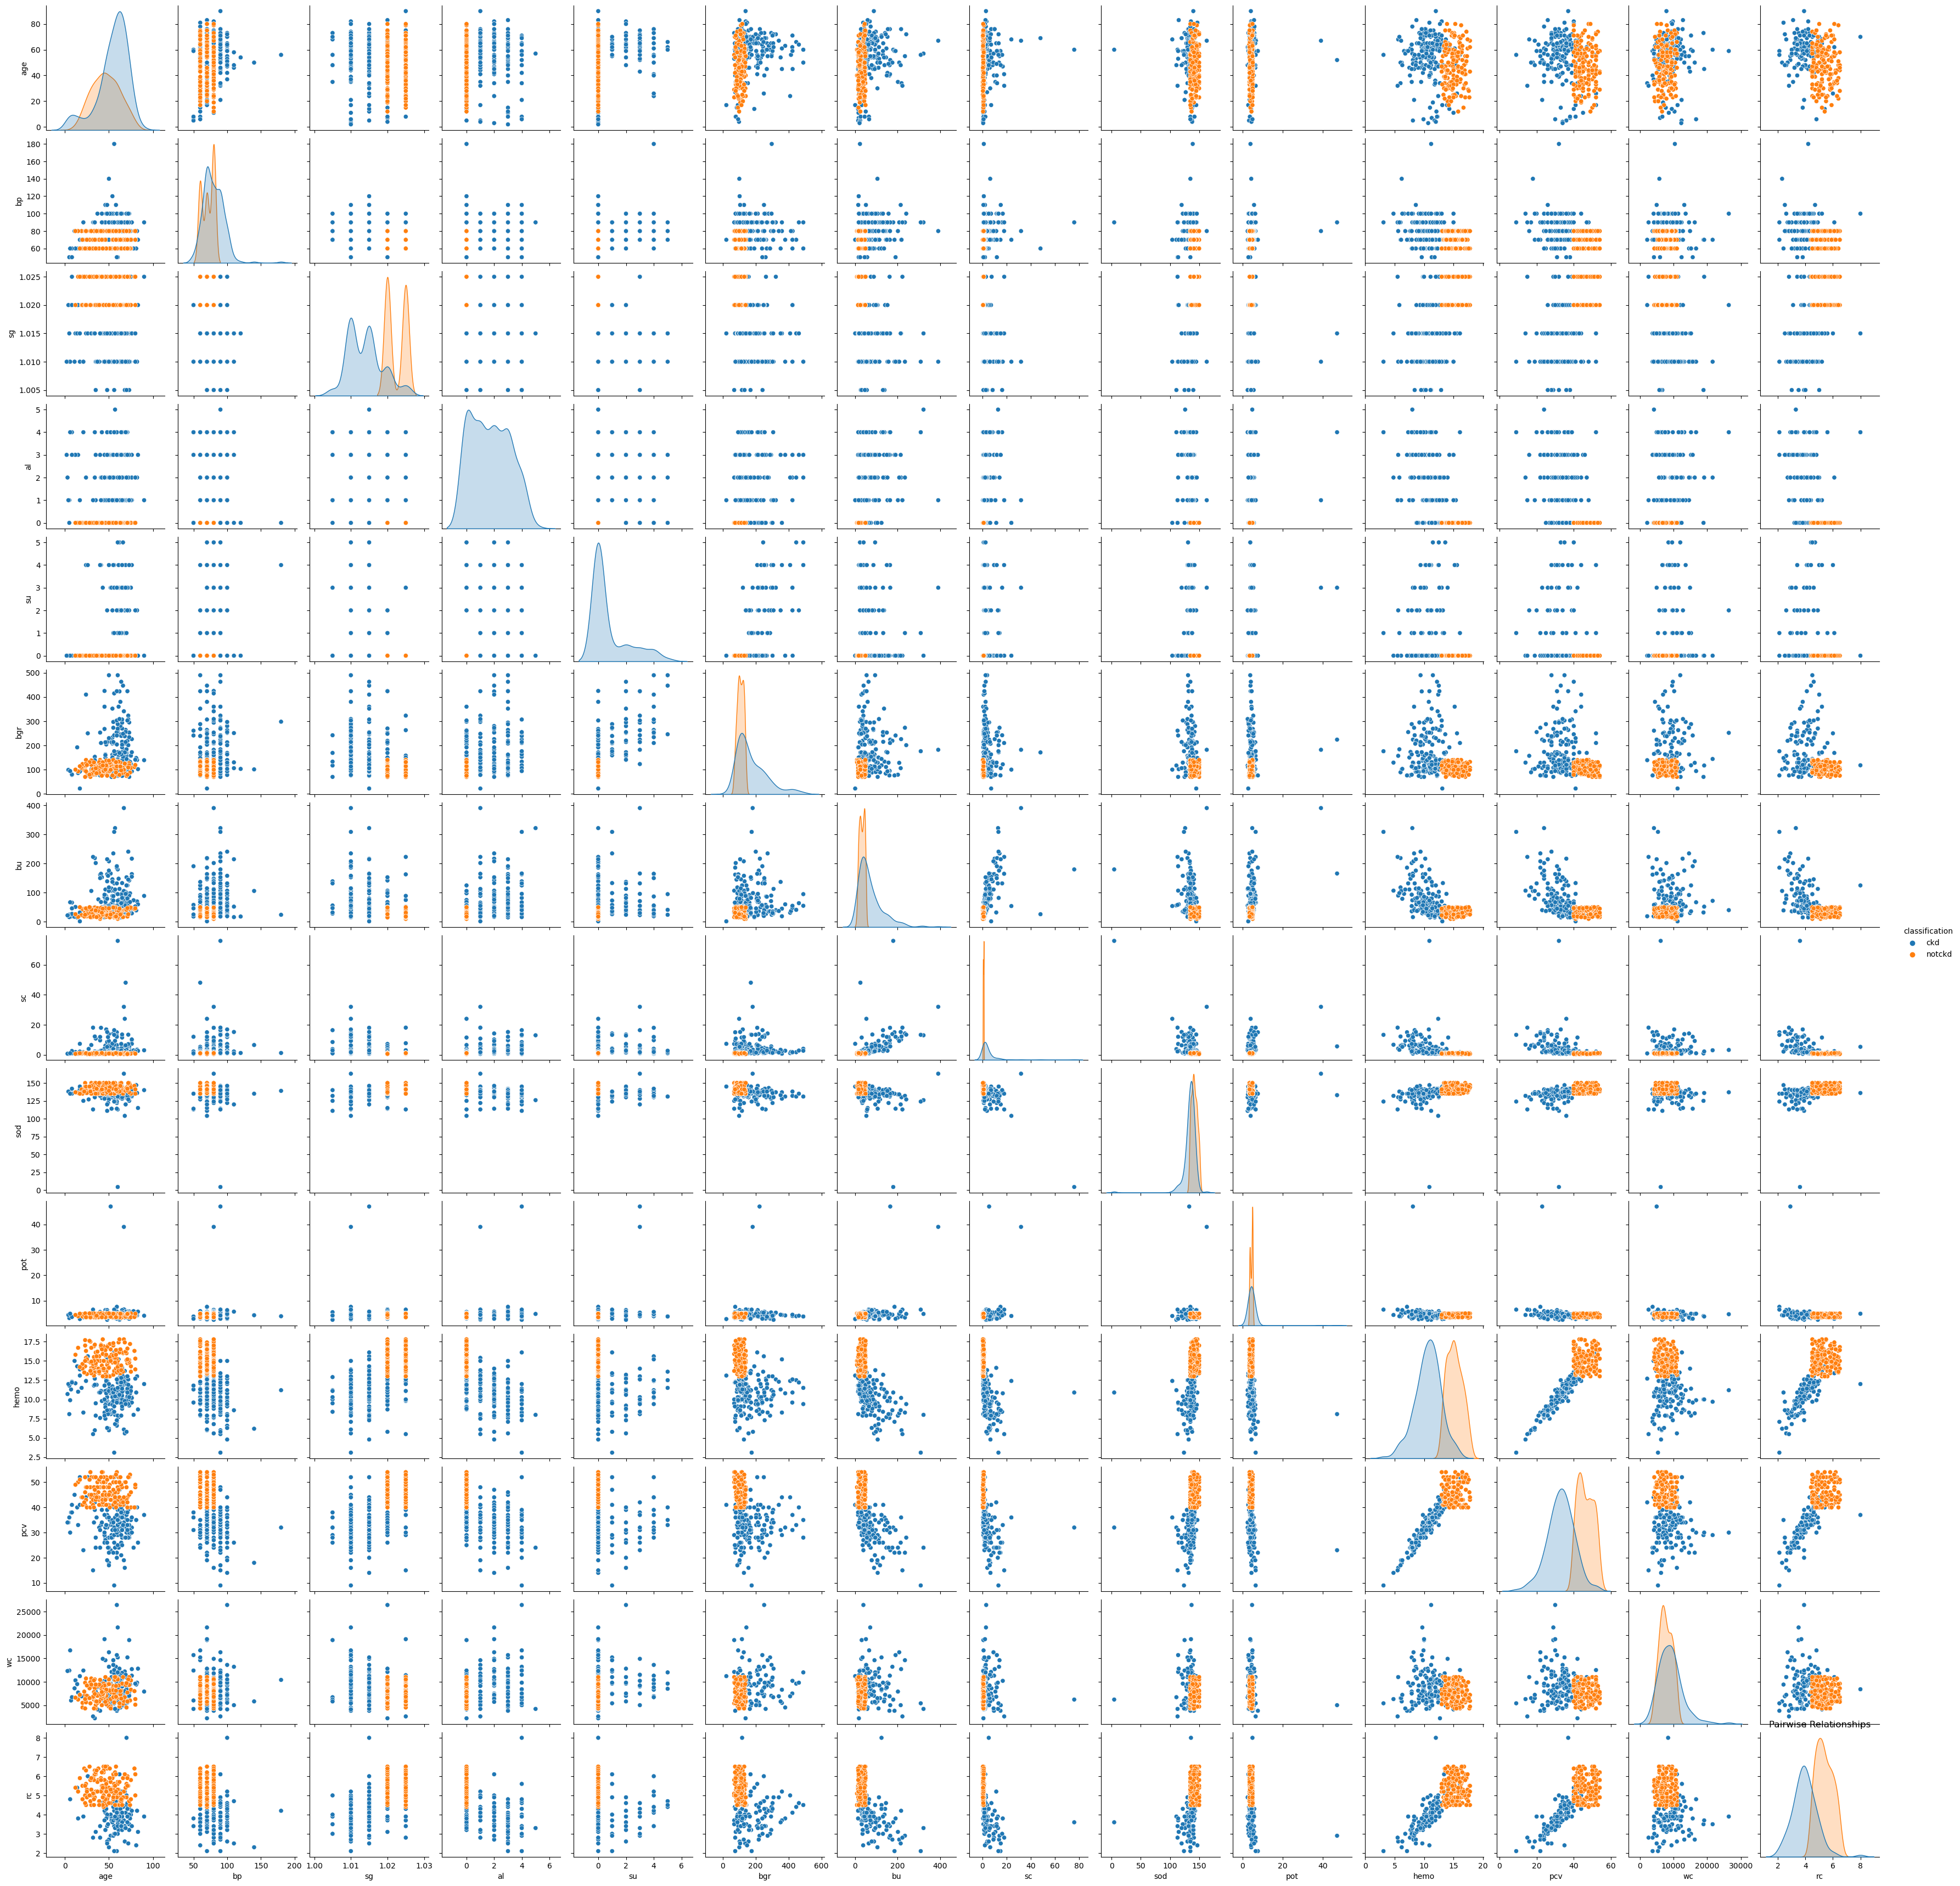

In [49]:
# Pairwise relationships
plt.figure(figsize=(12, 10))
sns.pairplot(dataset[numerical_features + ['classification']], hue='classification')
plt.title('Pairwise Relationships')
plt.show()

# EDA 1 complete, now a little data preprocessing and then EDA2 and EDA3